In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Pierwsze zgrubne wyniki i ich reprezentacja bez znormalizowania

led_3K = [77, 220, 185]
led_4K = [63, 116, 102]
led_6_5K = [80, 92, 93]

plt.figure(1)
plt.plot(led_3K)
plt.plot(led_4K)
plt.plot(led_6_5K)

[0.15975104 0.45643154 0.38381743]
[0.22419929 0.41281139 0.36298932]
[0.30188679 0.34716981 0.3509434 ]


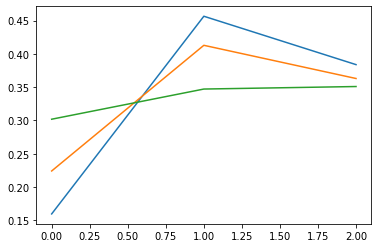

In [2]:
# Normalizacja i przentacja wyników po znormalizowaniu 
# Widać zależność jest zbliżona do liniowej

import numpy as np

led_3K = np.asarray(led_3K)
led_4K = np.asarray(led_4K)
led_6_5K = np.asarray(led_6_5K)
#Zarowka = np.asarray(Zarowka)
led_3K = led_3K/sum(led_3K)
led_4K = led_4K/sum(led_4K)
led_6_5K = led_6_5K/sum(led_6_5K)
#Zarowka = Zarowka/sum(Zarowka)
print(led_3K)
print(led_4K)
print(led_6_5K)
#print(Zarowka)
plt.figure(1)
plt.plot(led_3K)
plt.plot(led_4K)
plt.plot(led_6_5K)
#plt.plot(Zarowka)

In [7]:
# Zdefiniowanie modelu wstępnego
# Parametry a1-a3 wyliczono w excelu przy użyciu metedo eliminacji gaussa

def colorTempEstimation(led):
    a1 = 12207.72
    a2 = -23127.91
    a3 = 29799.72
    estym = ((a1*led[0])+(a2*led[1])+(a3*led[2]))
    return round(estym)

print("3000K estimation:",colorTempEstimation(led_3K))
print("4000K estimation:",colorTempEstimation(led_4K))
print("6500K estimation:",colorTempEstimation(led_6_5K))
#print(colorTempEstimation(Zarowka))

3000K estimation: 2832.0
4000K estimation: 4006.0
6500K estimation: 6114.0


In [8]:
def normalize(rgb_t):
    rgb_t_np = np.asarray(rgb_t)
    return rgb_t_np/sum(rgb_t_np)

def printColorTempEstimation(rgb_t):
    N_rgb_t = normalize(rgb_t)
    cte = colorTempEstimation(N_rgb_t)
    print(cte)
    return cte

In [9]:
# Porównanie skrajnych wyników w celu ustalenia rozrzutu
# Oraz potencjalnych błędów

CiepleB = [77,220,185]
CiepleE = [87, 238, 202]
m4K_B = [63, 116, 102]
m4K_E = [63, 120, 106]
m6K5_B = [80, 92, 93]
m6K5_E = [84, 95, 97]

allGad = [[77,220,185],
[87, 238, 202],
[63, 116, 102],
[63, 120, 106],
[80, 92, 93],
[84, 95, 97]]



for m in allGad:
    printColorTempEstimation(m)


2832.0
2993.0
4006.0
3988.0
6114.0
6228.0


Rozrzuty wzorca i modelu, dla wielu pomiarów:

3000K

2832.0
2908.0
2993.0
2891.0
2964.0
2874.0
2876.0
2944.0

Wzrzec 3000K - Rozrzut:  161.0  Średnia: 2910.25

4000K

4006.0
4082.0
3988.0
4011.0
4082.0

Wzrzec 4000K - Rozrzut:  94.0  Średnia: 4033.8

6500K

6114.0
6001.0
6206.0
6313.0
6091.0
6206.0

Wzrzec 6500K - Rozrzut:  312.0  Średnia: 6155.166666666667


Text(0.5, 1.0, '3000K : 4000K : 6500K')

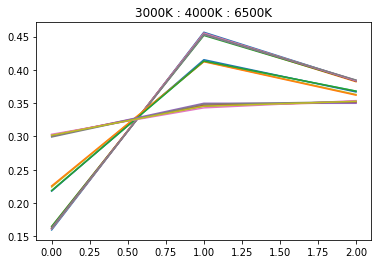

In [10]:
# Oszacowanie rozrzutu wyników dla wzorca i przyjetego modelu

roz_3K = [[77,220,185],
[83,229,193],
[87,238,202],
[82,230,194],
[83,231,196],
[79,222,187],
[79,223,188],
[82,230,195]]

roz_4K = [[63,116,102],
[63,119,106],
[63,120,106],
[63,115,101],
[63,119,106]]

roz_6K5 = [[80,92,93],
[79,92,92],
[83,95,97],
[84,95,98],
[79,92,93],
[83,95,97]]

print("Rozrzuty wzorca i modelu, dla wielu pomiarów:\n")
print("3000K\n")
plt.figure(1)
estym = []
for mesure in roz_3K:
    mesure = normalize(mesure)
    plt.plot(mesure)
    #plt.title("3000K")
    estym.append(printColorTempEstimation(mesure))
print("\nWzrzec 3000K - Rozrzut: ", max(estym) - min(estym), " Średnia:", sum(estym)/len(estym))

print("\n4000K\n")
plt.figure(1)
estym = []
for mesure in roz_4K:
    mesure = normalize(mesure)
    plt.plot(mesure)
    #plt.title("4000K")
    estym.append(printColorTempEstimation(mesure))
print("\nWzrzec 4000K - Rozrzut: ", max(estym) - min(estym), " Średnia:", sum(estym)/len(estym))

print("\n6500K\n")
plt.figure(1)
estym = []
for mesure in roz_6K5:
    mesure = normalize(mesure)
    plt.plot(mesure)
    #plt.title("6500K")
    estym.append(printColorTempEstimation(mesure))
print("\nWzrzec 6500K - Rozrzut: ", max(estym) - min(estym), " Średnia:", sum(estym)/len(estym))

plt.title("3000K : 4000K : 6500K")
    

In [18]:
print(roz_3K[1])
roz_3K_N = normalize(roz_3K[1])
print("3000K average param: ",roz_3K_N)
print(colorTempEstimation(roz_3K_N))

print(roz_4K[3])
roz_4K_N = normalize(roz_4K[3])
print("4000K average param: ",roz_4K_N)
print(colorTempEstimation(roz_4K_N))

print(roz_6K5[2])
roz_6K5_N = normalize(roz_6K5[2])
print("6500K average param: ",roz_6K5_N)
print(colorTempEstimation(roz_6K5_N))


[83, 229, 193]
3000K average param:  [0.16435644 0.45346535 0.38217822]
2908.0
[63, 115, 101]
4000K average param:  [0.22580645 0.41218638 0.36200717]
4011.0
[83, 95, 97]
6500K average param:  [0.30181818 0.34545455 0.35272727]
6206.0


In [30]:
# Wybrane probki są najbardziej zbliżone do wartości średnich dla poszczególnych wzorców 
# Posłużą jako baza do opymalizacji algorytmu
macierzBazowa = [roz_3K_N, roz_4K_N, roz_6K5_N]

macierzBazowaN = np.asarray(macierzBazowa)
print(macierzBazowaN)

[[0.16435644 0.45346535 0.38217822]
 [0.22580645 0.41218638 0.36200717]
 [0.30181818 0.34545455 0.35272727]]


In [33]:
from numpy.linalg import solve

solve(macierzBazowaN, [3000, 4000, 6500])

def colorTempEstimation2(led):
    a1 = 7904.23992281
    a2 = -34825.04288165
    a3 = 45771.4140223
    estym = ((a1*led[0])+(a2*led[1])+(a3*led[2]))
    return round(estym)

def printColorTempEstimation2(rgb_t):
    N_rgb_t = normalize(rgb_t)
    cte = colorTempEstimation2(N_rgb_t)
    print(cte)
    return cte

Rozrzuty wzorca i modelu, dla wielu pomiarów:

3000K

2935.0
3000.0
3122.0
3000.0
3103.0
2976.0
2987.0
3084.0

Wzrzec 3000K - Rozrzut:  187.0  Średnia: 3025.875

4000K

4010.0
4186.0
4051.0
4000.0
4186.0

Wzrzec 4000K - Rozrzut:  186.0  Średnia: 4086.6

6500K

6359.0
6203.0
6500.0
6647.0
6353.0
6500.0

Wzrzec 6500K - Rozrzut:  444.0  Średnia: 6427.0


Text(0.5, 1.0, '3000K : 4000K : 6500K')

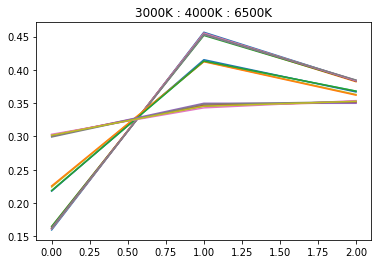

In [34]:
# Oszacowanie rozrzutu wyników nowego modelu dla pomiarów jak wyżej

roz_3K = [[77,220,185],
[83,229,193],
[87,238,202],
[82,230,194],
[83,231,196],
[79,222,187],
[79,223,188],
[82,230,195]]

roz_4K = [[63,116,102],
[63,119,106],
[63,120,106],
[63,115,101],
[63,119,106]]

roz_6K5 = [[80,92,93],
[79,92,92],
[83,95,97],
[84,95,98],
[79,92,93],
[83,95,97]]

print("Rozrzuty wzorca i modelu, dla wielu pomiarów:\n")
print("3000K\n")
plt.figure(1)
estym = []
for mesure in roz_3K:
    mesure = normalize(mesure)
    plt.plot(mesure)
    #plt.title("3000K")
    estym.append(printColorTempEstimation2(mesure))
print("\nWzrzec 3000K - Rozrzut: ", max(estym) - min(estym), " Średnia:", sum(estym)/len(estym))

print("\n4000K\n")
plt.figure(1)
estym = []
for mesure in roz_4K:
    mesure = normalize(mesure)
    plt.plot(mesure)
    #plt.title("4000K")
    estym.append(printColorTempEstimation2(mesure))
print("\nWzrzec 4000K - Rozrzut: ", max(estym) - min(estym), " Średnia:", sum(estym)/len(estym))

print("\n6500K\n")
plt.figure(1)
estym = []
for mesure in roz_6K5:
    mesure = normalize(mesure)
    plt.plot(mesure)
    #plt.title("6500K")
    estym.append(printColorTempEstimation2(mesure))
print("\nWzrzec 6500K - Rozrzut: ", max(estym) - min(estym), " Średnia:", sum(estym)/len(estym))

plt.title("3000K : 4000K : 6500K")
    

In [54]:
# Nowe źródło (nie wzorcowe)

n_xK = [[66, 150, 141],
[77, 162, 127],
[108, 168, 128],
[113, 168, 126],
[82, 178, 134]]

n_xK = np.asarray(n_xK)

printColorTempEstimation2(n_xK1)
printColorTempEstimation2(n_xK2)
printColorTempEstimation2(n_xK3)
printColorTempEstimation2(n_xK4)
printColorTempEstimation2(n_xK5)

4907.0
2131.0
2133.0
1990.0
1479.0


1479.0

In [58]:
n_xK[:,0]
n_xK_av = [sum(n_xK[:,1])/len(n_xK[:,1]), sum(n_xK[:,1])/len(n_xK[:,2]),sum(n_xK[:,2])/len(n_xK[:,2])]

In [59]:
n_xK_av

[165.2, 165.2, 131.2]

In [61]:
# Źródło żarowe 
n_xK = [70, 113, 117]
printColorTempEstimation2(n_xK)

6578.0
[[0.16435644 0.45346535 0.38217822]
 [0.22580645 0.41218638 0.36200717]
 [0.30181818 0.34545455 0.35272727]
 [0.23333333 0.37666667 0.39      ]]


LinAlgError: Last 2 dimensions of the array must be square